# Notebook for plotting twist defect data

This script was used to generate data in Nodelman et al., 2025 NSMB. It reads in a single csv file and plots data in a bar graph.

The expected format of the csv file is one construct per row, with the construct name first, followed by values from different replicates. Data can be separated by multiple commas, which allows experiments to be organized by the days they were carried out (OK to have empty cells/multiple commas without data between every one). Note that the first line is ignored (used for naming experimental datasets. Example data (used for paper) is Nodelman2025NSB-TwistDefectDyad-2024Aug12.csv

To run this on your computer, you must give the correct paths/directories for the data and output. These are labeled ###Edit this ### in the block 'Edit this block - define data filename and directories' 

## preamble

In [1]:
%matplotlib inline
from __future__ import division
import matplotlib
#import matplotlib as mpl

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import sys
import time
import statistics
from pylab import *
import re
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import scipy.optimize as opt
from scipy.optimize import curve_fit

matplotlib.rcParams['font.sans-serif']='Arial'
matplotlib.rcParams.update({'font.size': 24, "axes.formatter.limits": (-4,4)})
plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}


colorlist=["red","orange","green","dodgerblue","darkviolet","gray","brown","orange","chocolate","blue",
          "pink","navajowhite","lightgray","cyan","lightskyblue","mediumpurple","red","olive","brown","green",
           "dodgerblue","darkviolet","red","orange","green","yellowgreen","darkviolet","gray","brown","orange","chocolate","blue",
          "pink","navajowhite","lightgray","cyan","lightskyblue","mediumpurple","red","olive","brown","green",
           "dodgerblue","darkviolet","red","orange","green","dodgerblue","darkviolet","gray","brown","orange","chocolate","blue",
          "pink","navajowhite","lightgray","cyan","lightskyblue","mediumpurple","red","olive","brown","green",
           "dodgerblue","darkviolet","red","orange","green","dodgerblue","darkviolet","gray","brown","orange","chocolate","blue",
          "pink","navajowhite","lightgray","cyan","lightskyblue","mediumpurple","red","olive","brown","green",
           "dodgerblue","darkviolet"
          ]

## defs

In [2]:
def gettimestamp():
    '''
    returns a string of the current day-hour-min
    be sure to import time in preamble
    '''
    if time.localtime().tm_min < 10:
        currenttimestamp=str(time.localtime().tm_year)+"_"+str(time.localtime().tm_mon)+"_"+str(time.localtime().tm_mday)+"-"+str(time.localtime().tm_hour)+"0"+str(time.localtime().tm_min)
    else:
        currenttimestamp=str(time.localtime().tm_year)+"_"+str(time.localtime().tm_mon)+"_"+str(time.localtime().tm_mday)+"-"+str(time.localtime().tm_hour)+str(time.localtime().tm_min)
    return(currenttimestamp)

def convertcsvtodict(tempfilename,existingdict):
    '''
    this function takes a filename, assuming it to be a csv file, and dumps data into existing dictionary
    note that first line of csv file is skipped.
    data format is for first item of each line to be construct name, followed by data.
    some data may be blank
    '''
    tempfile=open(tempfilename,"r")
    datalist=[]
    tempfilelist=tempfile.readlines()
    tempfile.close()
    existingdict["constructlist-all"]=[]
    for i in range(1,len(tempfilelist)): ### skips first line
        linelisttemp=tempfilelist[i].split(",")
        #print(linelisttemp)
        #print("constructname = ",linelisttemp[0])
        ### make new dictionary entry based on this line of data; first item is key==construct name
        existingdict[linelisttemp[0]]={}
        existingdict[linelisttemp[0]]["constructname"]=linelisttemp[0]
        #existingdict[linelisttemp[0]]["colordefault"]=colorlist[i]
        existingdict[linelisttemp[0]]["colordefault"]="pink"
        existingdict[linelisttemp[0]]["color"]="purple"
        existingdict[linelisttemp[0]]["position"]=i
        existingdict[linelisttemp[0]]["origdata"]=[]
        existingdict["constructlist-all"].append(linelisttemp[0])
        for j in range(1,len(linelisttemp)):
            if linelisttemp[j]=="" or linelisttemp[j]=="\n":
                continue
                #print("EMPTY")
            else:
                print("{} {}".format(linelisttemp[0],linelisttemp[j]))
                existingdict[linelisttemp[0]]["origdata"].append(float(linelisttemp[j]))
                #print(linelisttemp[j])    
    return(existingdict)


## Edit this block - define data filename and directories

In [6]:
### Edit this ###
csvdirectory="/Users/gbowman3/tempdata/"
inputdatafile = csvdirectory+"Nodelman2025NSB-TwistDefectDyad-2024Aug12.csv"

### Edit this ###
outputdirectory="/Users/gbowman3/temp/"
try:
    os.listdir(outputdirectory)
except FileNotFoundError:
    os.mkdir(outputdirectory)
    print("created new directory for output files:\n{}\n\n".format(outputdirectory))
print(outputdirectory)

/Users/gbowman3/temp/


In [7]:
twistdefectdyaddict ={}

### read data from file
twistdefectdyaddict=convertcsvtodict(inputdatafile,twistdefectdyaddict)

### calculate avg and stdev, given the raw data just input
for construct in twistdefectdyaddict["constructlist-all"]:
    if len(twistdefectdyaddict[construct]["origdata"])>1:
        twistdefectdyaddict[construct]["AVG"]=np.mean(twistdefectdyaddict[construct]["origdata"])
        twistdefectdyaddict[construct]["STD"]=np.std(twistdefectdyaddict[construct]["origdata"])
    elif len(twistdefectdyaddict[construct]["origdata"])==1:
        twistdefectdyaddict[construct]["AVG"]=twistdefectdyaddict[construct]["origdata"][0]
        twistdefectdyaddict[construct]["STD"]=0
        

for item in twistdefectdyaddict["constructlist-all"]:
    if "AVG" in twistdefectdyaddict[item]:
        print("{} {}".format(item, twistdefectdyaddict[item]['origdata']))
        print("{} {} {:5.2f}+/-{:5.2f}".format(item, twistdefectdyaddict[item]["colordefault"],twistdefectdyaddict[item]["AVG"],twistdefectdyaddict[item]["STD"]))


NCP-apo 0.092287005
NCP-apo 0.073870957
NCP-apo 0.080499845
NCP-apo 0.111616315
NCP-apo 0.076165222
NCP-apo 0.088402769
NCP-apo 0.073371189
NCP-apo 0.059413635
NCP-apo 0.041939243
NCP-apo 0.02492582
NCP-ADP 0.044328778
NCP-ADP 0.065184837
NCP-AMPPNP 0.070902542
NCP-AMPPNP 0.043164115
NCP-AMPPNP 0.078554552
NCP-AMPPNP 0.329106686
NCP-AMPPNP 0.060623379
NCP-AMPPNP 0.025878722
NCP-AMPPNP 0.110070131
NCP-ADP-BeF3 0.104859672
NCP-ADP-BeF3 0.146251085
NCP-ADP-BeF3 0.092058513
NCP-ADP-BeF3 0.019868379
NCP-ADP-BeF3 0.051600099

120Bwt-apo 0.042519421
120Bwt-apo 0.039844334
120Bwt-apo 0.031485802
120Bwt-apo 0.049433556
120Bwt-apo 0.005925583
120Bwt-apo 0.0183584
120Bwt-ADP 0.036835551
120Bwt-ADP 0.049299096
120Bwt-ADP 0.037629187
120Bwt-ADP 0.04063572
120Bwt-ADP 0.033708434
120Bwt-ADP 0.023170861
120Bwt-AMPPNP 0.103658007
120Bwt-AMPPNP 0.073550567
120Bwt-AMPPNP 0.089230934
120Bwt-AMPPNP 0.114411433
120Bwt-AMPPNP 0.120639523
120Bwt-AMPPNP 0.116119259
120Bwt-AMPPNP 0.094680999
120Bwt-AMPPNP 0.097

In [8]:
for construct in twistdefectdyaddict["constructlist-all"]:
    print(construct)
    if "BeF" in construct:
        print()

NCP-apo
NCP-ADP
NCP-AMPPNP
NCP-ADP-BeF3

120Bwt-apo
120Bwt-ADP
120Bwt-AMPPNP
120Bwt-ADP-BeF3

SAIL-apo
SAIL-ADP
SAIL-AMPPNP
SAIL-ADP-BeF3

M652Q-apo
M652Q-ADP
M652Q-AMPPNP
M652Q-ADP-BeF3

SAIL-Lobe2-apo
SAIL-Lobe2-ADP
SAIL-Lobe2-AMPPNP
SAIL-Lobe2-ADP-BeF3

F917N/L918N/F921N-apo
F917N/L918N/F921N-ADP
F917N/L918N/F921N-AMPPNP
F917N/L918N/F921N-ADP-BeF3

W932A-apo
W932A-ADP
W932A-AMPPNP
W932A-ADP-BeF3

L865N-L869N-AMPPNP
876-881-apo
876-881-ADP
876-881-AMPPNP
876-881-ADP-BeF3

F877N-AMPPNP
F877N-ADP-BeF3

884-889-apo
884-889-ADP
884-889-AMPPNP
884-889-ADP-BeF3

L886N/L889N/L891N-apo
L886N/L889N/L891N-ADP
L886N/L889N/L891N-AMPPNP
L886N/L889N/L891N-ADP-BeF3

Lobe2-apo
Lobe2-ADP
Lobe2-AMPPNP
Lobe2-ADP-BeF3

I843N-apo
I843N-ADP
I843N-AMPPNP
I843N-ADP-BeF3

L865N-L869N-AMPPNP
I583N-apo
I583N-ADP
I583N-AMPPNP
I583N-ADP-BeF3

I838N-apo
I838N-ADP
I838N-AMPPNP
I838N-ADP-BeF3

Y841A-apo
Y841A-ADP
Y841A-AMPPNP
Y841A-ADP-BeF3

A842N-apo
A842N-ADP
A842N-AMPPNP
A842N-ADP-BeF3

Y926N-apo
Y926N-ADP
Y926N

In [9]:
### set colors for bar graph

for construct in twistdefectdyaddict["constructlist-all"]:
    twistdefectdyaddict[construct]['linecolor']="black"
    twistdefectdyaddict[construct]["linewidth"]=0
    twistdefectdyaddict[construct]["linestyle"]='solid'

    if 'NCP' in construct:
        twistdefectdyaddict[construct]['color']="white"
        twistdefectdyaddict[construct]['linecolor']="gray"
        twistdefectdyaddict[construct]["linewidth"]=1.5
        
    if '120Bwt' in construct:
        twistdefectdyaddict[construct]['color']="darkslategray"
        twistdefectdyaddict[construct]['linecolor']="white"
            
    if 'SAIL-Lobe2' in construct:
        twistdefectdyaddict[construct]['color']="red"
        twistdefectdyaddict[construct]['linecolor']="lawngreen"
        twistdefectdyaddict[construct]["linewidth"]=5
    elif '-SAIL-' in construct:
        twistdefectdyaddict[construct]['color']="red"
        twistdefectdyaddict[construct]['linecolor']="lawngreen"
        twistdefectdyaddict[construct]["linewidth"]=5
    elif 'SAIL' in construct:
        twistdefectdyaddict[construct]['color']="lawngreen"
    elif 'Lobe2' in construct:
        twistdefectdyaddict[construct]['color']="red"
        twistdefectdyaddict[construct]['linecolor']="darkorange"
        twistdefectdyaddict[construct]["linewidth"]=5

    if '583' in construct:
        twistdefectdyaddict[construct]['color']="gray"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
        
    if '838' in construct:
        twistdefectdyaddict[construct]['color']="white"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
        
    elif 'Y841A' in construct:
        twistdefectdyaddict[construct]['color']="white"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
    elif 'A842N' in construct:
        twistdefectdyaddict[construct]['color']="white"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
    if '-I843N-' in construct:
        twistdefectdyaddict[construct]['color']="red"
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]["linewidth"]=2
    elif 'I843N' in construct:
        twistdefectdyaddict[construct]['color']="white"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
        
        
    if '-Y926N-' in construct:
        twistdefectdyaddict[construct]['color']="red"
        twistdefectdyaddict[construct]['linecolor']="dodgerblue"
        twistdefectdyaddict[construct]["linewidth"]=5
    elif 'Y926N' in construct:
        twistdefectdyaddict[construct]['color']="dodgerblue"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
    
    if '-W932A-' in construct:
        twistdefectdyaddict[construct]['color']="red"
        twistdefectdyaddict[construct]['linecolor']="dodgerblue"
        twistdefectdyaddict[construct]["linewidth"]=5
    elif 'W932A' in construct:
        twistdefectdyaddict[construct]['color']="dodgerblue"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
    

    if 'L865N/L869N' in construct:
        twistdefectdyaddict[construct]['color']="lawngreen"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
        
    if '876-881' in construct:
        twistdefectdyaddict[construct]['color']="forestgreen"

    if 'M876N' in construct:
        twistdefectdyaddict[construct]['color']="forestgreen"        
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2

    if 'F877N' in construct:
        twistdefectdyaddict[construct]['color']="forestgreen"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
        
    if '884-889' in construct:
        twistdefectdyaddict[construct]['color']="red"

    if '890-895' in construct:
        twistdefectdyaddict[construct]['color']="darkorange"

    if 'L886N/L889N/L891N' in construct:
        twistdefectdyaddict[construct]['color']="red"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2
        
    if '896-901' in construct:
        twistdefectdyaddict[construct]['color']="gold" #"lightskyblue"

    if '902-907' in construct:
        twistdefectdyaddict[construct]['color']="khaki"

    if 'F917N/L918N/F921N' in construct:
        twistdefectdyaddict[construct]['color']="dodgerblue"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2

    if 'N547A' in construct:
        twistdefectdyaddict[construct]['color']="pink"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2

    if 'M652Q' in construct:
        twistdefectdyaddict[construct]['color']="white"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2

    if 'L699Q' in construct:
        twistdefectdyaddict[construct]['color']="white"
        twistdefectdyaddict[construct]["linestyle"]='dashed'
        twistdefectdyaddict[construct]['linecolor']="black"
        twistdefectdyaddict[construct]["linewidth"]=2

    if '∆634-653' in construct:
        twistdefectdyaddict[construct]['color']="lightcoral"

    if 'D513N' in construct:
        twistdefectdyaddict[construct]['color']="beige"

    if 'R804A/R807A' in construct:
        twistdefectdyaddict[construct]['color']="brown"


                                 
                                 

In [10]:
### set order: this is for main figure 4

twistdefectdyaddict["constructlist"]=[#'NCP-apo', 'NCP-ADP', 
                                       #'NCP-AMPPNP','NCP-ADP-BeF3',
                                       
                                       #'120Bwt-apo','120Bwt-ADP', 
                                       '120Bwt-AMPPNP','120Bwt-ADP-BeF3',

                                       'I583N-AMPPNP','I583N-ADP-BeF3',
                                       'I838N-AMPPNP','I838N-ADP-BeF3',
    
                                       #'Y841A-apo', 'Y841A-ADP',
                                       #'Y841A-AMPPNP','Y841A-ADP-BeF3',
                                       
                                       #'A842N-apo', 'A842N-ADP',
                                       #'A842N-AMPPNP','A842N-ADP-BeF3',
                                       
                                       #'I843N-apo', 'I843N-ADP',
                                       'I843N-AMPPNP','I843N-ADP-BeF3',
                                       
                                       #'884-889-I843N-apo','884-889-I843N-ADP',
                                       '884-889-I843N-AMPPNP','884-889-I843N-ADP-BeF3',
                                       
                                       #'SAIL-apo', 'SAIL-ADP',
                                       'SAIL-AMPPNP','SAIL-ADP-BeF3',
                                       
                                       #'L865N/L869N-AMPPNP', 
                                       
                                       #'884-889-SAIL-apo', '884-889-SAIL-ADP',
                                       #'884-889-SAIL-AMPPNP','884-889-SAIL-ADP-BeF3',
                                       
                                       #'SAIL-Lobe2-apo', 'SAIL-Lobe2-ADP',
                                       #'SAIL-Lobe2-AMPPNP','SAIL-Lobe2-ADP-BeF3',
                                       
                                       #'876-881-apo', '876-881-ADP', 
                                       #'876-881-AMPPNP','876-881-ADP-BeF3',
                                       
                                       #'884-889-apo', '884-889-ADP', 
                                       '884-889-AMPPNP','884-889-ADP-BeF3',
                                       
                                       #'L886N/L889N/L891N-apo', 'L886N/L889N/L891N-ADP', 
                                       #'L886N/L889N/L891N-AMPPNP','L886N/L889N/L891N-ADP-BeF3',
                                       
                                       #'Lobe2-apo', 'Lobe2-ADP',
                                       #'Lobe2-AMPPNP','Lobe2-ADP-BeF3',
                                       
                                       #'F917N/L918N/F921N-apo', 'F917N/L918N/F921N-ADP',
                                       'F917N/L918N/F921N-AMPPNP','F917N/L918N/F921N-ADP-BeF3'
                                       
                                       
                                       #'Y926N-apo', 'Y926N-ADP',
                                       #'Y926N-AMPPNP','Y926N-ADP-BeF3',
                                       #'884-889-Y926N-apo', '884-889-Y926N-ADP',
                                       #'884-889-Y926N-AMPPNP','884-889-Y926N-ADP-BeF3',
                                       
                                       #'W932A-apo', 'W932A-ADP',
                                       #'W932A-AMPPNP','W932A-ADP-BeF3',
                                       #'884-889-W932A-apo', '884-889-W932A-ADP',
                                       #'884-889-W932A-AMPPNP','884-889-W932A-ADP-BeF3'
                                       
                                       #'N547A-apo','N547A-ADP',
                                       #'N547A-AMPPNP','N547A-ADP-BeF3',
                                       
                                       #'M652Q-apo', 'M652Q-ADP', 
                                       #'M652Q-AMPPNP','M652Q-ADP-BeF3'
                                      ]
### change position:
### here set position automatically from the list
for i in range(len(twistdefectdyaddict["constructlist"])):
    twistdefectdyaddict[twistdefectdyaddict["constructlist"][i]]['position']=i

for item in twistdefectdyaddict["constructlist"]:
    print("*{}*".format(item))


*120Bwt-AMPPNP*
*120Bwt-ADP-BeF3*
*I583N-AMPPNP*
*I583N-ADP-BeF3*
*I838N-AMPPNP*
*I838N-ADP-BeF3*
*I843N-AMPPNP*
*I843N-ADP-BeF3*
*884-889-I843N-AMPPNP*
*884-889-I843N-ADP-BeF3*
*SAIL-AMPPNP*
*SAIL-ADP-BeF3*
*884-889-AMPPNP*
*884-889-ADP-BeF3*
*F917N/L918N/F921N-AMPPNP*
*F917N/L918N/F921N-ADP-BeF3*


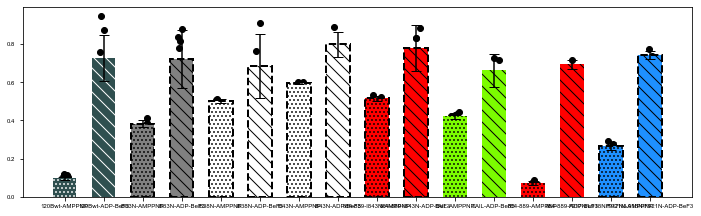

In [11]:
### plot bar graphs, based on construct list in dictionary
plotStyles3={"markersize":9,"markeredgewidth":1.0,"linewidth":3.0}
mpl.rcParams.update({'font.size': 6, "axes.formatter.limits": (-4,4)})
mpl.rcParams.update({"figure.figsize": (12,3.5),'errorbar.capsize': 2})

updatedpositions = []
for construct in twistdefectdyaddict["constructlist"]:
    updatedpositions.append(twistdefectdyaddict[construct]["position"])
    
fig, ax = plt.subplots()
spread=0.4
w = 0.6    # bar width
cap=5
for construct in twistdefectdyaddict["constructlist"]:
    if "AMPPNP" in construct:
        ax.bar(
           twistdefectdyaddict[construct]["position"],
           height = twistdefectdyaddict[construct]["AVG"],
           yerr=twistdefectdyaddict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectdyaddict[construct]["color"],
           linestyle = twistdefectdyaddict[construct]["linestyle"],
           linewidth = twistdefectdyaddict[construct]["linewidth"],
           edgecolor = twistdefectdyaddict[construct]["linecolor"],
           hatch='...'
            #color = (0,0,0,0)#"black"
          )
    elif "BeF" in construct:
        ax.bar(
           twistdefectdyaddict[construct]["position"],
           height = twistdefectdyaddict[construct]["AVG"],
           yerr=twistdefectdyaddict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectdyaddict[construct]["color"],
           linestyle = twistdefectdyaddict[construct]["linestyle"],
           linewidth = twistdefectdyaddict[construct]["linewidth"],
           edgecolor = twistdefectdyaddict[construct]["linecolor"],
           hatch='\\\\'
           )
    elif "ADP" in construct:
        ax.bar(
           twistdefectdyaddict[construct]["position"],
           height = twistdefectdyaddict[construct]["AVG"],
           yerr=twistdefectdyaddict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectdyaddict[construct]["color"],
           linestyle = twistdefectdyaddict[construct]["linestyle"],
           linewidth = twistdefectdyaddict[construct]["linewidth"],
           edgecolor = twistdefectdyaddict[construct]["linecolor"],
           hatch='///'
           )
    else:
        ax.bar(
           twistdefectdyaddict[construct]["position"],
           height = twistdefectdyaddict[construct]["AVG"],
           yerr=twistdefectdyaddict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectdyaddict[construct]["color"],
           linestyle = twistdefectdyaddict[construct]["linestyle"],
           linewidth = twistdefectdyaddict[construct]["linewidth"],
           edgecolor = twistdefectdyaddict[construct]["linecolor"]
            #color = (0,0,0,0)#"black"
           )
for construct in twistdefectdyaddict["constructlist"]:
    for point in twistdefectdyaddict[construct]["origdata"]:
        ax.scatter(
            twistdefectdyaddict[construct]["position"] + np.random.random()*w*spread-w*spread/2,point,color="black")


plt.xticks(updatedpositions,labels=twistdefectdyaddict["constructlist"])
label_size = 14
#add time stamp to filename
workingname=outputdirectory+"TwistDefectPlot-plus1dyadbiotinblocked-mainFig4-"+gettimestamp()+".pdf"

#save plot as a PDF
savefig(workingname,format='pdf',dpi=300, bbox_inches='tight')
#ax.set_xticks(updatedpositions,twistdefectdyaddict["constructlist"])
plt.show()

## write CSV output file (top line ignored)

In [12]:
workingname="Dyadplus1data-"+gettimestamp()+".csv"
myfile=open(outputdirectory+workingname,"w")

### header with basic info
myfile.write("this output file:"+","+workingname+"\n")

myfile.write("date/time,"+gettimestamp()+"\n")

myfile.write("\n")

### print in groups by nucleotide state 
nucleotidelist = ['apo','AMPPNP','BeF3']
constructsoutput = [] #keep track of which are being printed

for nucleotide in nucleotidelist:  
    for folder in twistdefectdyaddict['constructlist-all']:
        if nucleotide in folder:
            constructsoutput.append(folder)
            myfile.write("{}, ".format(folder))
            for data in twistdefectdyaddict[folder]['origdata']:
                myfile.write('{},'.format(data))
            myfile.write('\n')
    myfile.write('\n\n')

### now print ADP data
for folder in twistdefectdyaddict['constructlist-all']:
    if folder not in constructsoutput:
        constructsoutput.append(folder)
        myfile.write("{}, ".format(folder))
        for data in twistdefectdyaddict[folder]['origdata']:
            myfile.write('{},'.format(data))
        myfile.write('\n')
myfile.write('\n\n')
myfile.close()


In [14]:

### set order: this is for supplemental figure 2 

twistdefectdyaddict["constructlist"]=[#'NCP-apo', 'NCP-ADP', 
                                       #'NCP-AMPPNP','NCP-ADP-BeF3',
                                       
                                       #'120Bwt-apo','120Bwt-ADP', 
                                       '120Bwt-AMPPNP','120Bwt-ADP-BeF3',
                                       
                                       #'SAIL-apo', 'SAIL-ADP',
                                       #'SAIL-AMPPNP','SAIL-ADP-BeF3',
                                       
                                       #'L865N/L869N-AMPPNP', 
                                       #'M652Q-apo', 'M652Q-ADP', 
                                       'M652Q-AMPPNP','M652Q-ADP-BeF3',
    
                                       #'L886N/L889N/L891N-apo', 'L886N/L889N/L891N-ADP', 
                                       'L886N/L889N/L891N-AMPPNP','L886N/L889N/L891N-ADP-BeF3',
    
                                       #'884-889-SAIL-apo', '884-889-SAIL-ADP',
                                       '884-889-SAIL-AMPPNP','884-889-SAIL-ADP-BeF3',
                                       
                                       #'SAIL-Lobe2-apo', 'SAIL-Lobe2-ADP',
                                       'SAIL-Lobe2-AMPPNP','SAIL-Lobe2-ADP-BeF3',
                                       
                                       #'Lobe2-apo', 'Lobe2-ADP',
                                       'Lobe2-AMPPNP','Lobe2-ADP-BeF3',
                                       
                                       #'876-881-apo', '876-881-ADP', 
                                       #'876-881-AMPPNP','876-881-ADP-BeF3',
                                       
                                       #'884-889-apo', '884-889-ADP', 
                                       #'884-889-AMPPNP','884-889-ADP-BeF3',
                                       
                                       #'F917N/L918N/F921N-apo', 'F917N/L918N/F921N-ADP',
                                       #'F917N/L918N/F921N-AMPPNP','F917N/L918N/F921N-ADP-BeF3',
                                       
                                       #'I583N-AMPPNP','I583N-ADP-BeF3',
                                       #'I838N-AMPPNP','I838N-ADP-BeF3',
    
                                       #'Y841A-apo', 'Y841A-ADP',
                                       'Y841A-AMPPNP','Y841A-ADP-BeF3',
                                       
                                       #'A842N-apo', 'A842N-ADP',
                                       'A842N-AMPPNP','A842N-ADP-BeF3',
                                       
                                       #'I843N-apo', 'I843N-ADP',
                                       #'I843N-AMPPNP','I843N-ADP-BeF3',
                                       
                                       #'884-889-I843N-apo','884-889-I843N-ADP',
                                       #'884-889-I843N-AMPPNP','884-889-I843N-ADP-BeF3',
                                       
                                       #'Y926N-apo', 'Y926N-ADP',
                                       'Y926N-AMPPNP','Y926N-ADP-BeF3',
                                       #'884-889-Y926N-apo', '884-889-Y926N-ADP',
                                       '884-889-Y926N-AMPPNP','884-889-Y926N-ADP-BeF3',
                                       
                                       #'W932A-apo', 'W932A-ADP',
                                       'W932A-AMPPNP','W932A-ADP-BeF3',
                                       #'884-889-W932A-apo', '884-889-W932A-ADP',
                                       '884-889-W932A-AMPPNP','884-889-W932A-ADP-BeF3'
                                       
                                       #'N547A-apo','N547A-ADP',
                                       #'N547A-AMPPNP','N547A-ADP-BeF3',
                                       
                                       
                                      ]
### change position:
### here set position automatically from the list
for i in range(len(twistdefectdyaddict["constructlist"])):
    twistdefectdyaddict[twistdefectdyaddict["constructlist"][i]]['position']=i

for item in twistdefectdyaddict["constructlist"]:
    print("*{}*".format(item))


*120Bwt-AMPPNP*
*120Bwt-ADP-BeF3*
*M652Q-AMPPNP*
*M652Q-ADP-BeF3*
*L886N/L889N/L891N-AMPPNP*
*L886N/L889N/L891N-ADP-BeF3*
*884-889-SAIL-AMPPNP*
*884-889-SAIL-ADP-BeF3*
*SAIL-Lobe2-AMPPNP*
*SAIL-Lobe2-ADP-BeF3*
*Lobe2-AMPPNP*
*Lobe2-ADP-BeF3*
*Y841A-AMPPNP*
*Y841A-ADP-BeF3*
*A842N-AMPPNP*
*A842N-ADP-BeF3*
*Y926N-AMPPNP*
*Y926N-ADP-BeF3*
*884-889-Y926N-AMPPNP*
*884-889-Y926N-ADP-BeF3*
*W932A-AMPPNP*
*W932A-ADP-BeF3*
*884-889-W932A-AMPPNP*
*884-889-W932A-ADP-BeF3*


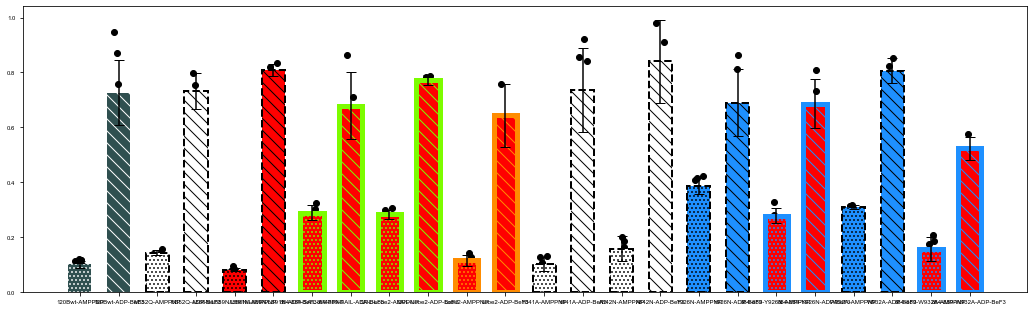

In [15]:
### plot bar graphs, based on construct list in dictionary
plotStyles3={"markersize":9,"markeredgewidth":1.0,"linewidth":3.0}
mpl.rcParams.update({'font.size': 6, "axes.formatter.limits": (-4,4)})
mpl.rcParams.update({"figure.figsize": (18,5.25),'errorbar.capsize': 2})

updatedpositions = []
for construct in twistdefectdyaddict["constructlist"]:
    updatedpositions.append(twistdefectdyaddict[construct]["position"])
    
fig, ax = plt.subplots()
spread=0.4
w = 0.6    # bar width
cap=5
for construct in twistdefectdyaddict["constructlist"]:
    if "AMPPNP" in construct:
        ax.bar(
           twistdefectdyaddict[construct]["position"],
           height = twistdefectdyaddict[construct]["AVG"],
           yerr=twistdefectdyaddict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectdyaddict[construct]["color"],
           linestyle = twistdefectdyaddict[construct]["linestyle"],
           linewidth = twistdefectdyaddict[construct]["linewidth"],
           edgecolor = twistdefectdyaddict[construct]["linecolor"],
           hatch='...'
            #color = (0,0,0,0)#"black"
          )
    elif "BeF" in construct:
        ax.bar(
           twistdefectdyaddict[construct]["position"],
           height = twistdefectdyaddict[construct]["AVG"],
           yerr=twistdefectdyaddict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectdyaddict[construct]["color"],
           linestyle = twistdefectdyaddict[construct]["linestyle"],
           linewidth = twistdefectdyaddict[construct]["linewidth"],
           edgecolor = twistdefectdyaddict[construct]["linecolor"],
           hatch='\\\\'
           )
    elif "ADP" in construct:
        ax.bar(
           twistdefectdyaddict[construct]["position"],
           height = twistdefectdyaddict[construct]["AVG"],
           yerr=twistdefectdyaddict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectdyaddict[construct]["color"],
           linestyle = twistdefectdyaddict[construct]["linestyle"],
           linewidth = twistdefectdyaddict[construct]["linewidth"],
           edgecolor = twistdefectdyaddict[construct]["linecolor"],
           hatch='///'
           )
    else:
        ax.bar(
           twistdefectdyaddict[construct]["position"],
           height = twistdefectdyaddict[construct]["AVG"],
           yerr=twistdefectdyaddict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectdyaddict[construct]["color"],
           linestyle = twistdefectdyaddict[construct]["linestyle"],
           linewidth = twistdefectdyaddict[construct]["linewidth"],
           edgecolor = twistdefectdyaddict[construct]["linecolor"]
            #color = (0,0,0,0)#"black"
           )
for construct in twistdefectdyaddict["constructlist"]:
    for point in twistdefectdyaddict[construct]["origdata"]:
        ax.scatter(
            twistdefectdyaddict[construct]["position"] + np.random.random()*w*spread-w*spread/2,point,color="black")


plt.xticks(updatedpositions,labels=twistdefectdyaddict["constructlist"])
label_size = 14
#add time stamp to filename
workingname=outputdirectory+"TwistDefectPlot-plus1dyadbiotinblocked-suppFig2-"+gettimestamp()+".pdf"

#uncomment to save plot as a PDF
savefig(workingname,format='pdf',dpi=300, bbox_inches='tight')
#ax.set_xticks(updatedpositions,twistdefectdyaddict["constructlist"])
plt.show()